In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model_functions import *
from sklearn.decomposition import PCA

In [ ]:
#uncomment to run and create the all_psds file. 

#subject_data, freqs, targets = load_data(duration=30,overlap=15,seg_length=4)
#save_psds(subject_data,freqs,targets,'all_psds.pickle')

In [2]:
subject_data, freqs, targets = load_psds('all_psds.pickle')
test_labels = align_test_labels(classes=['A','C'])
features, targets = remove_class(subject_data,targets,'F')
features, targets = remove_test(features,targets,test_labels)
rbps = [relative_band_power(features[i],freqs,freq_bands=[0.5,4.0,7.0,9.0,11.0,13.0,25.0,45.0]) 
        for i in range(len(features))]

Using all examples from the training set.

In [3]:
X, y = train_prep(rbps,targets,exclude=None,flatten_final=True)

Compute PCA.

In [4]:
pca = PCA()
pca.fit(X)
pca.components_.shape

(133, 133)

A bit of code from one of Matt's notebooks (Principal Components Analysis - Complete) that computes the explained variance curve in terms of the number of components used. Adjusted to our scales.

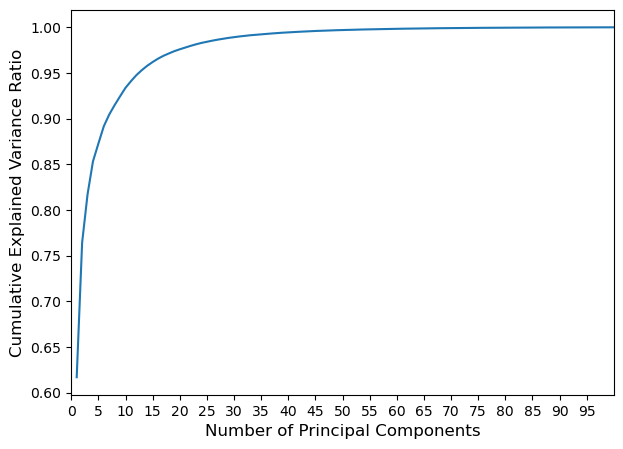

In [20]:
## make the explained variance curve
plt.figure(figsize=(7,5))


plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
            np.cumsum(pca.explained_variance_ratio_))

plt.ylabel("Cumulative Explained Variance Ratio", fontsize=12)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.xticks(range(0,100,5),fontsize=10)
plt.yticks(fontsize=10)

plt.xlim(0,100)

plt.show()

You can see that 35 is a bit past where the explained variance curve starts to really level out. 

The unroll function below undoes the reshaping in the train_prep function to allow us to see what channels and frequency bands this corresponds to. 

In [5]:
freq_bands=[0.5,4.0,7.0,9.0,11.0,13.0,25.0,45.0]
# returns channel index and band index from the flattened index. 
def unroll(index):
    return index % len(CHANNELS), index // len(CHANNELS)

Largest component of first principal component. 

In [6]:
channel, band = unroll(np.argmax(pca.components_[0]))
(CHANNELS[channel], band)

('O2', 3)

That's the fourth frequency band (9.0-11.0) and the 'O2' channel, which if we reference to a picture of the standard_1020 labeling scheme we can see is at the rear of the scalp. Comparing this to the DICE-net figure 7 we see that we are picking up one of the channels their neural network focused strongly on. 

Looking at a few more components.

In [40]:
channel, band = unroll(np.argmax(pca.components_[1]))
(CHANNELS[channel], band)

('P3', 3)

In [53]:
for i in range(35):
    channel, band = unroll(np.argmax(pca.components_[i]))
    print((CHANNELS[channel], band))

('O2', 3)
('P3', 3)
('Fp1', 4)
('Fp2', 3)
('T4', 3)
('Pz', 2)
('P4', 0)
('T4', 3)
('T6', 4)
('F4', 3)
('T4', 0)
('F4', 5)
('P3', 3)
('F7', 5)
('T4', 3)
('F7', 5)
('Fp1', 0)
('O2', 0)
('T3', 3)
('Fp1', 0)
('Fz', 1)
('O1', 0)
('T6', 6)
('Fp1', 0)
('P3', 0)
('P3', 5)
('F3', 1)
('Fz', 1)
('T3', 6)
('C3', 2)
('Cz', 5)
('C4', 6)
('Fp1', 3)
('C4', 6)
('T6', 6)


In [7]:
sort_indices = np.argsort(pca.components_[0])
sort_indices

array([ 98,  63,  56, 105,  42,  77,  84, 126,  70,  49,  91,  21,   7,
         0, 112,  14,  28,  35, 119, 123,  39, 116,  32,  18,  25,  95,
         4,  74,  11,  81,  88, 109,  53, 130,  46, 102, 122,  60,  67,
        31,  38,  48, 118,  13,  62,  69, 132, 125,  55,  41, 121,  34,
         6,  37,  30, 111, 104,  17,  20,  16,  24, 115,  27,  40,  33,
        72,   5,  23, 131, 117,  97, 124,  93,   2,  12,  94,  90,  54,
        73,  61,  68,   9, 114,  79,  19, 110,  47,   3,  10,  86,  80,
        26,  96, 103,  83,  87,  89,  75,  82,  71,  64,  57,  51,   1,
        99, 128,  76,  85, 106,  43,  78,   8,  50,  36, 127,  29,  15,
       120,  92,  22, 113,  52, 129,  44,  45, 107,  65, 108,  58, 100,
        59, 101,  66], dtype=int64)

In [9]:
for i in range(1,21):
    channel, band = unroll(sort_indices[-i])
    print((CHANNELS[channel], band))

('O2', 3)
('P3', 5)
('F3', 3)
('C4', 5)
('Fp2', 3)
('T4', 5)
('O1', 3)
('T3', 5)
('P4', 2)
('P3', 2)
('T6', 6)
('T5', 2)
('Pz', 5)
('F4', 1)
('Fz', 4)
('P3', 6)
('T6', 0)
('F7', 1)
('T4', 6)
('Cz', 1)
